In [1]:
#import numpy as np
import pandas as pd
import config
from rule_comparison import plot_pie_chart, get_common_rules, display_comparison
from operator import itemgetter

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [2]:
# load saved rules
original_rules = pd.read_pickle("./original_rules.pkl")
mined_rules = pd.read_pickle("./mined_rules.pkl")
mined_rules_parameters = pd.read_pickle("./mined_rules_parameters.pkl")
parameter_combinations = pd.read_pickle("./parameter_combinations.pkl")

original_rules_median_PCA = original_rules["PCA Confidence"].median()
original_rules_median_HC = original_rules["Head Coverage"].median()

## Visualization of rule metrics

In [3]:
def get_dataframe_to_plot(all_rules, parameter_type, parameter_name):
    """
    Generate dataframe containing rules mined with certain parameter value
    """
    rules = all_rules.loc[(all_rules[parameter_type] == parameter_name)]
    return rules

### Parameter 1: KG embeddings

In [4]:
complEx_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "ComplEx")
distMult_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "DistMult")
transE_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "TransE")
randomBaseline_rules = get_dataframe_to_plot(mined_rules_parameters, "Model", "RandomBaseline")

In [5]:
complEx_rules.drop_duplicates("Rule")

,Rule,Head Coverage,PCA Confidence,Positive Examples,PCA Body size,Functional variable,Model,Entity_selection,Candidate_criteria
0,?b relative ?a => ?a relative ?b,0.551695,0.846610,2572,3038,-2,ComplEx,random,"(rank_cutoff, 1)"
1,?b child ?a => ?a mother ?b,0.978252,0.535374,16058,29994,-1,ComplEx,random,"(rank_cutoff, 1)"
2,?b spouse ?a => ?a spouse ?b,0.947839,0.992356,44138,44478,-1,ComplEx,random,"(rank_cutoff, 1)"
3,?b child ?a => ?a father ?b,0.942295,0.769749,47094,61181,-1,ComplEx,random,"(rank_cutoff, 1)"
4,?b mother ?a => ?a child ?b,0.247092,0.991847,16058,16190,-2,ComplEx,random,"(rank_cutoff, 1)"
...,...,...,...,...,...,...,...,...,...
25,?h child ?a ?b relative ?h => ?a relat...,0.083582,0.103348,392,3793,-2,ComplEx,least_frequent,"(rank_cutoff, 4)"
41,?g father ?a ?b mother ?g => ?a relati...,0.012793,0.148148,60,405,-2,ComplEx,least_frequent,"(rank_cutoff, 4)"
17,?a child ?h ?h mother ?b => ?a relativ...,0.013768,0.122411,65,531,-2,ComplEx,least_frequent,"(rank_cutoff, 7)"
58,?h mother ?b ?a mother ?h => ?a relati...,0.020335,0.182510,96,526,-2,ComplEx,least_frequent,"(rank_cutoff, 7)"


In [6]:
complEx_rules

,Rule,Head Coverage,PCA Confidence,Positive Examples,PCA Body size,Functional variable,Model,Entity_selection,Candidate_criteria
0,?b relative ?a => ?a relative ?b,0.551695,0.846610,2572,3038,-2,ComplEx,random,"(rank_cutoff, 1)"
1,?b child ?a => ?a mother ?b,0.978252,0.535374,16058,29994,-1,ComplEx,random,"(rank_cutoff, 1)"
2,?b spouse ?a => ?a spouse ?b,0.947839,0.992356,44138,44478,-1,ComplEx,random,"(rank_cutoff, 1)"
3,?b child ?a => ?a father ?b,0.942295,0.769749,47094,61181,-1,ComplEx,random,"(rank_cutoff, 1)"
4,?b mother ?a => ?a child ?b,0.247092,0.991847,16058,16190,-2,ComplEx,random,"(rank_cutoff, 1)"
...,...,...,...,...,...,...,...,...,...
97,?a sibling ?h ?b sibling ?h => ?a sibl...,0.718845,0.589977,54400,92207,-2,ComplEx,least_frequent,"(percent, 22)"
98,?g child ?a ?g child ?b => ?a sibling ?b,0.801789,0.664458,60677,91318,-2,ComplEx,least_frequent,"(percent, 22)"
99,?g sibling ?b ?a sibling ?g => ?a sibl...,0.721223,0.587982,54580,92826,-2,ComplEx,least_frequent,"(percent, 22)"
100,?h sibling ?a ?b sibling ?h => ?a sibl...,0.716162,0.584668,54197,92697,-2,ComplEx,least_frequent,"(percent, 22)"


EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 96  Common rules: 94


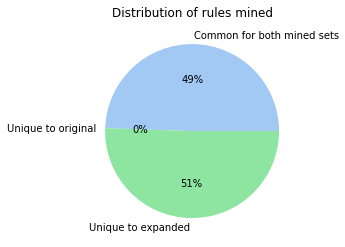

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 93  Common rules: 94


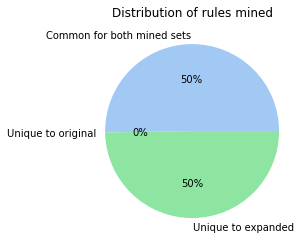

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 100  Common rules: 94


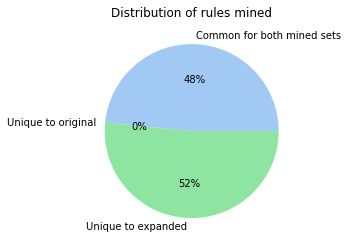

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 93  Common rules: 94


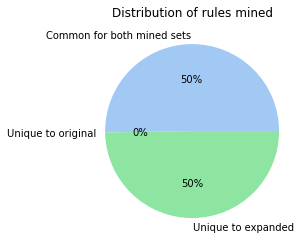

In [8]:
display_comparison(original_rules, complEx_rules.drop_duplicates("Rule"))
display_comparison(original_rules, distMult_rules.drop_duplicates("Rule"))
display_comparison(original_rules, transE_rules.drop_duplicates("Rule"))
display_comparison(original_rules, randomBaseline_rules.drop_duplicates("Rule"))

In [9]:
randomBaseline_rules

,Rule,Head Coverage,PCA Confidence,Positive Examples,PCA Body size,Functional variable,Model,Entity_selection,Candidate_criteria
0,?b relative ?a => ?a relative ?b,0.550386,0.845242,2567,3037,-2,RandomBaseline,random,"(rank_cutoff, 1)"
1,?b child ?a => ?a mother ?b,0.978126,0.535296,16053,29989,-1,RandomBaseline,random,"(rank_cutoff, 1)"
2,?b spouse ?a => ?a spouse ?b,0.947754,0.992266,44135,44479,-1,RandomBaseline,random,"(rank_cutoff, 1)"
3,?b mother ?a => ?a child ?b,0.247011,0.991783,16053,16186,-2,RandomBaseline,random,"(rank_cutoff, 1)"
4,?b child ?a => ?a father ?b,0.942252,0.769696,47090,61180,-1,RandomBaseline,random,"(rank_cutoff, 1)"
...,...,...,...,...,...,...,...,...,...
94,?g father ?a ?g sibling ?b => ?a child...,0.327985,0.952170,21321,22392,-2,RandomBaseline,least_frequent,"(percent, 22)"
95,?g sibling ?a ?g sibling ?b => ?a sibl...,0.721108,0.564373,54572,96695,-2,RandomBaseline,least_frequent,"(percent, 22)"
96,?a sibling ?h ?b sibling ?h => ?a sibl...,0.718610,0.589709,54383,92220,-2,RandomBaseline,least_frequent,"(percent, 22)"
97,?h sibling ?b ?a sibling ?h => ?a sibl...,0.721002,0.587892,54564,92813,-2,RandomBaseline,least_frequent,"(percent, 22)"


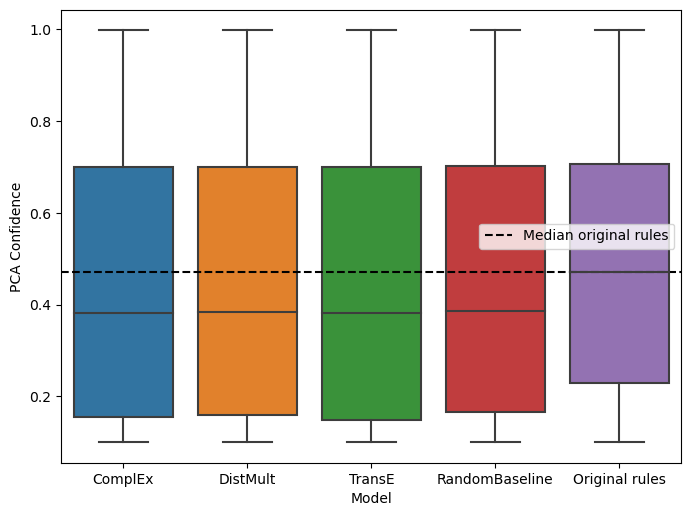

In [10]:
plt.subplots(figsize=(8,6), dpi=100)
ax = sns.boxplot(x="Model", y="PCA Confidence", data=mined_rules_parameters)
plt.axhline(original_rules_median_PCA, color = "black", label="Median original rules", linestyle="--")
plt.legend()

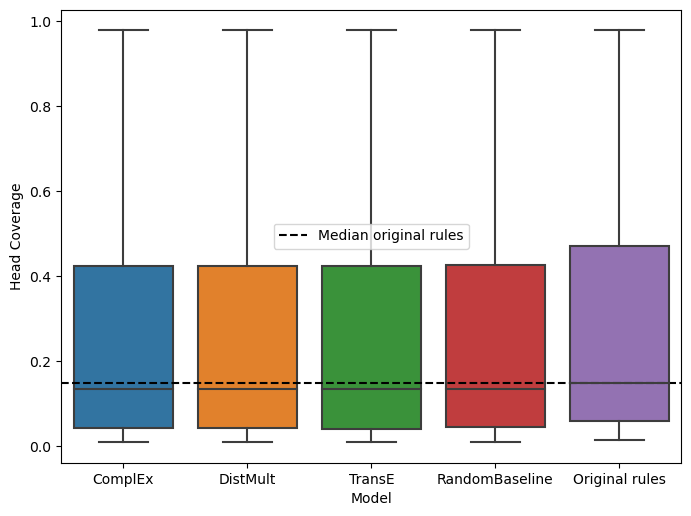

In [11]:
plt.subplots(figsize=(8,6), dpi=100)
ax = sns.boxplot(x="Model", y="Head Coverage", data=mined_rules_parameters)
plt.axhline(original_rules_median_HC, color = "black", label="Median original rules", linestyle="--")
plt.legend()

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

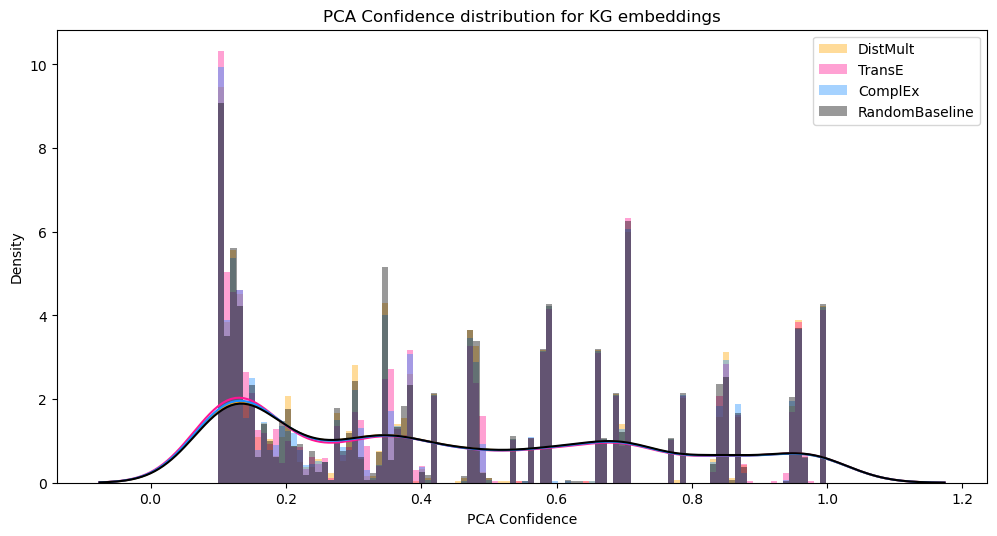

In [12]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(distMult_rules["PCA Confidence"] , color="orange", bins = 100, label="DistMult")
sns.distplot(transE_rules["PCA Confidence"] , color="deeppink", bins = 100, label="TransE")
sns.distplot(complEx_rules["PCA Confidence"] , color="dodgerblue", bins = 100, label="ComplEx")
sns.distplot(randomBaseline_rules["PCA Confidence"] , color="black", bins = 100, label="RandomBaseline")


plt.title('PCA Confidence distribution for KG embeddings')
plt.legend();

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

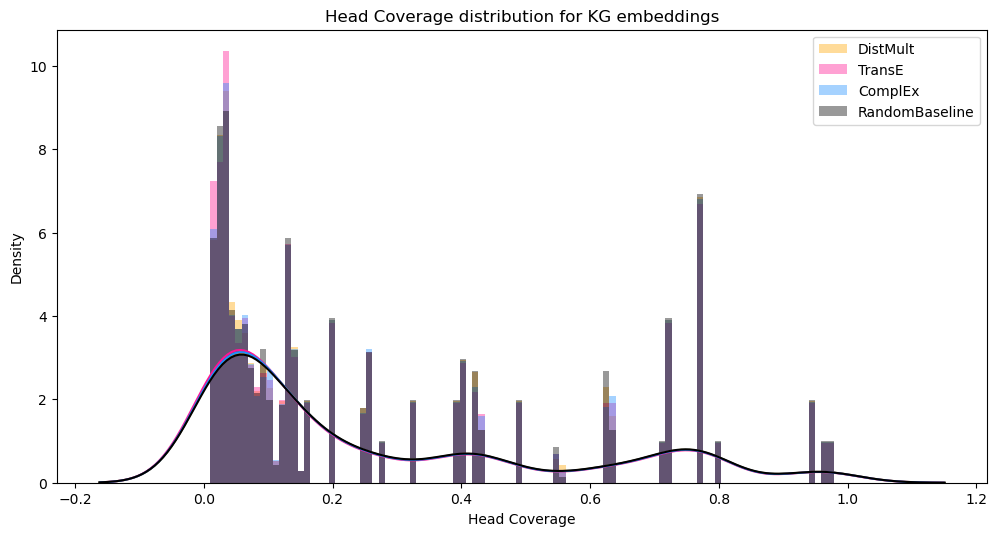

In [13]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(distMult_rules["Head Coverage"] , color="orange", bins = 100, label="DistMult")
sns.distplot(transE_rules["Head Coverage"] , color="deeppink", bins = 100, label="TransE")
sns.distplot(complEx_rules["Head Coverage"] , color="dodgerblue", bins = 100, label="ComplEx")
sns.distplot( randomBaseline_rules["Head Coverage"] , color="black", bins = 100, label="RandomBaseline")


plt.title('Head Coverage distribution for KG embeddings')
plt.legend();

### Parameter 2: entity selection method

In [14]:
random_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "random")
most_frequent_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "most_frequent")
least_frequent_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "least_frequent")
probabilistic_entity_rules = get_dataframe_to_plot(mined_rules_parameters, "Entity_selection", "probabilistic")

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 93  Common rules: 94


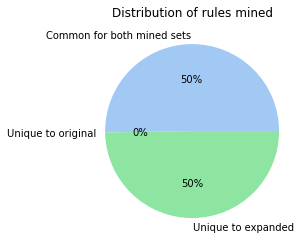

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 91  Common rules: 94


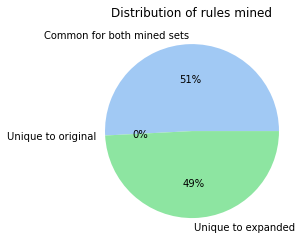

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 95  Common rules: 94


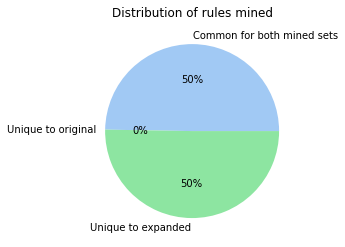

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 105  Common rules: 94


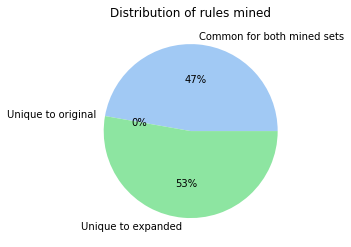

In [15]:
display_comparison(original_rules, random_entity_rules.drop_duplicates("Rule"))
display_comparison(original_rules, most_frequent_entity_rules.drop_duplicates("Rule"))
display_comparison(original_rules, least_frequent_entity_rules.drop_duplicates("Rule"))
display_comparison(original_rules, probabilistic_entity_rules.drop_duplicates("Rule"))

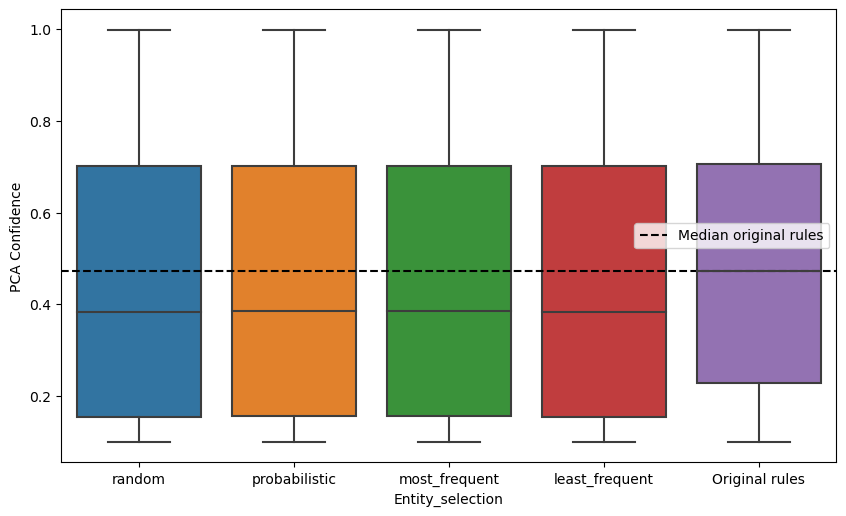

In [16]:
plt.subplots(figsize=(10,6), dpi=100)
ax = sns.boxplot(x="Entity_selection", y="PCA Confidence", data=mined_rules_parameters)
plt.axhline(original_rules_median_PCA, color = "black", label="Median original rules", linestyle="--")
plt.legend()


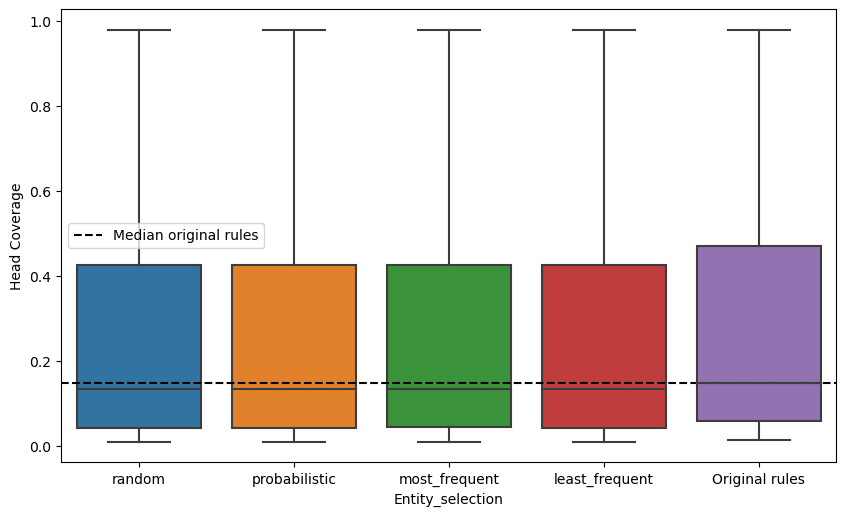

In [17]:
plt.subplots(figsize=(10,6), dpi=100)
ax = sns.boxplot(x="Entity_selection", y="Head Coverage", data=mined_rules_parameters)
plt.axhline(original_rules_median_HC, color = "black", label="Median original rules", linestyle="--")
plt.legend()

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

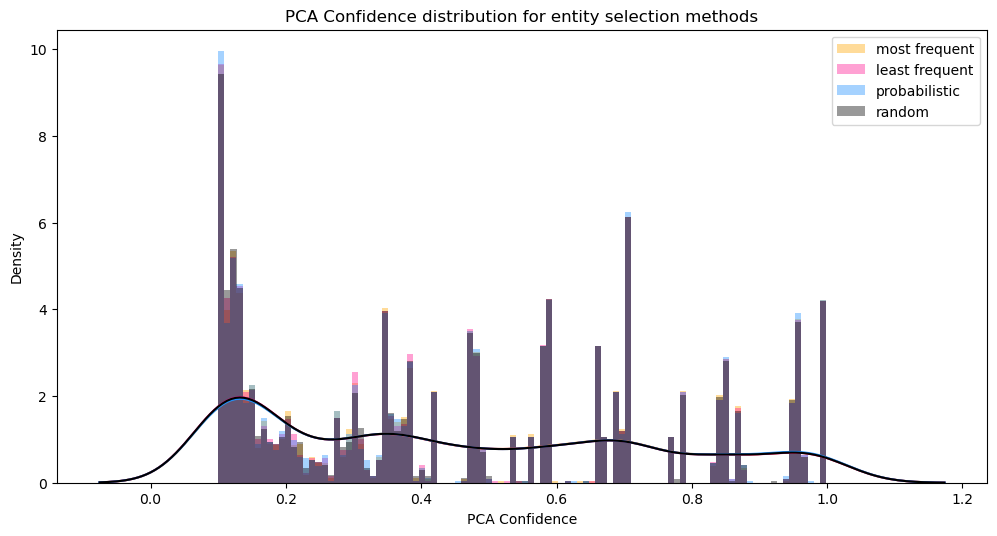

In [18]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(most_frequent_entity_rules["PCA Confidence"] , color="orange", bins = 100, label="most frequent")
sns.distplot(least_frequent_entity_rules["PCA Confidence"] , color="deeppink", bins = 100, label="least frequent")
sns.distplot( probabilistic_entity_rules["PCA Confidence"] , color="dodgerblue", bins = 100, label="probabilistic")
sns.distplot(random_entity_rules["PCA Confidence"] , color="black", bins = 100, label="random")


plt.title('PCA Confidence distribution for entity selection methods')
plt.legend();

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

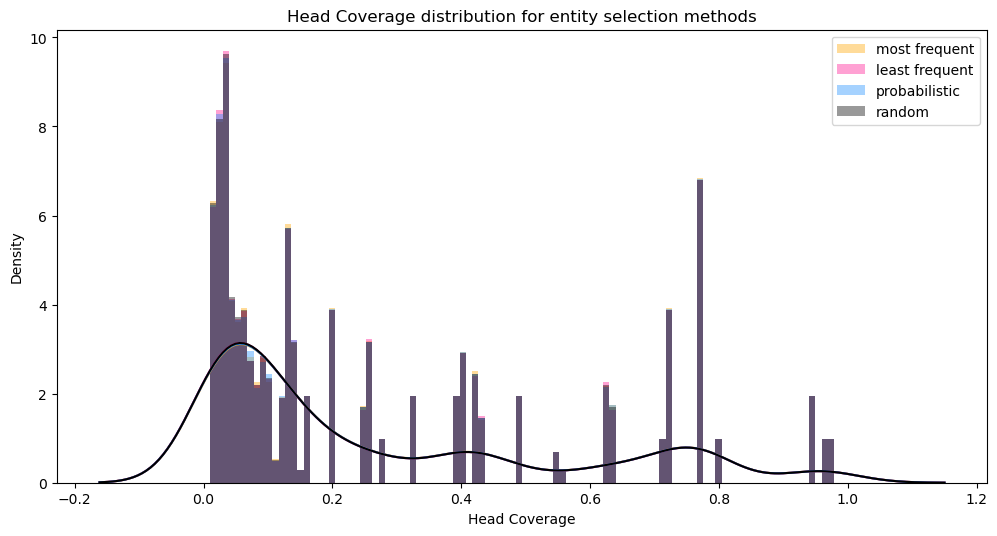

In [19]:
plt.subplots(figsize=(12,6), dpi=100)
sns.distplot(most_frequent_entity_rules["Head Coverage"] , color="orange", bins = 100, label="most frequent")
sns.distplot(least_frequent_entity_rules["Head Coverage"] , color="deeppink", bins = 100, label="least frequent")
sns.distplot( probabilistic_entity_rules["Head Coverage"] , color="dodgerblue", bins = 100, label="probabilistic")
sns.distplot(random_entity_rules["Head Coverage"] , color="black", bins = 100, label="random")


plt.title('Head Coverage distribution for entity selection methods')
plt.legend();

### Parameter 3: candidate admittance criteria

In [35]:
mined_rules_parameters['Candidate_criteria'] =  mined_rules_parameters.Candidate_criteria.astype(str)

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 41  Common rules: 94


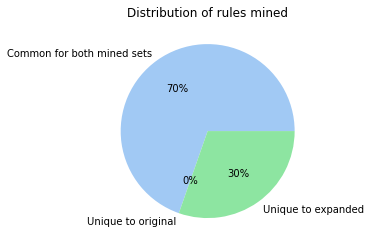

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 58  Common rules: 94


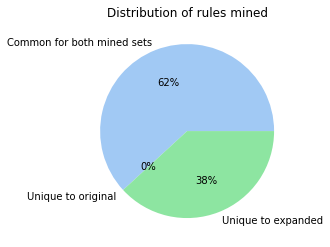

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 105  Common rules: 94


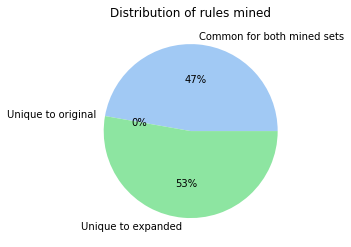

In [40]:
for rank in config.rank_cutoffs:
    rank_df = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", str(rank))
    display_comparison(original_rules, rank_df.drop_duplicates("Rule"))

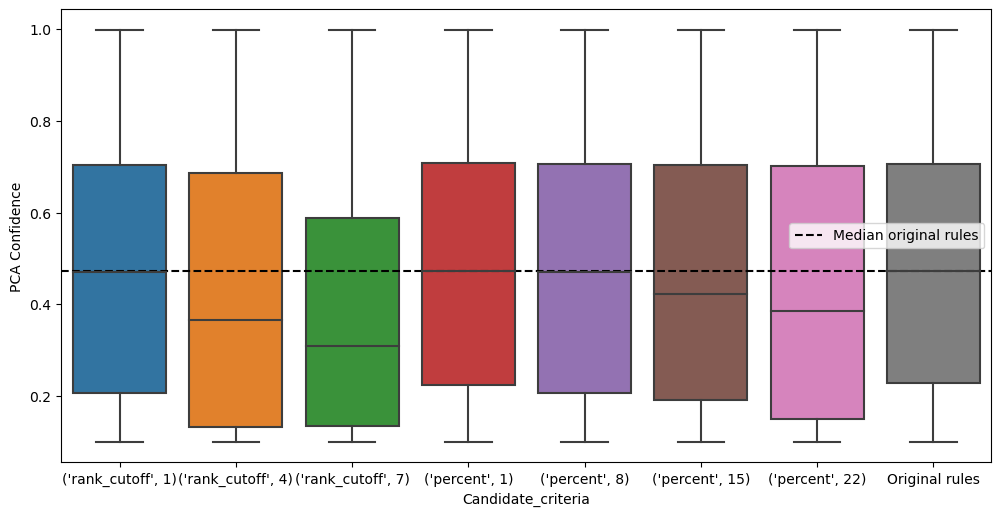

In [24]:
plt.subplots(figsize=(12,6), dpi=100)
ax = sns.boxplot(x="Candidate_criteria", y="PCA Confidence", data=mined_rules_parameters)
plt.axhline(original_rules_median_PCA, color = "black", label="Median original rules", linestyle="--")
plt.legend()

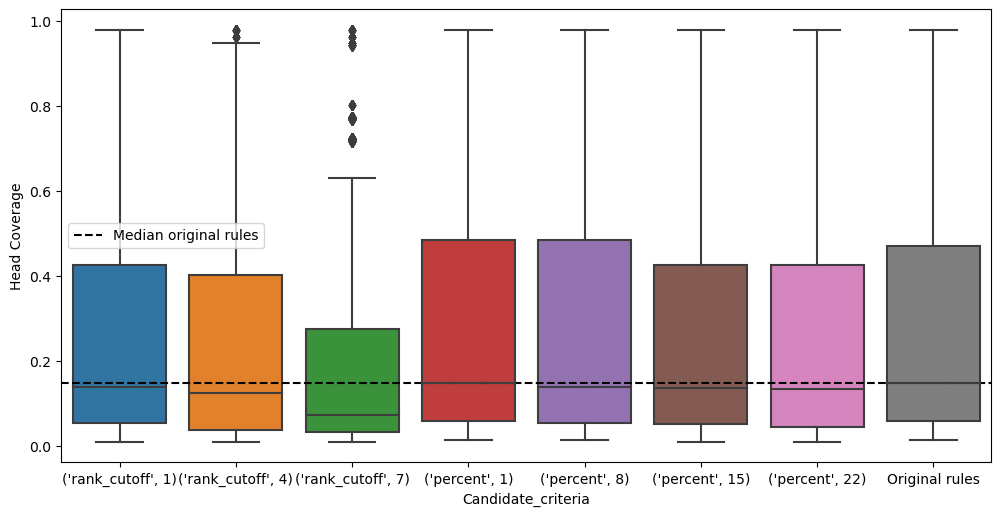

In [25]:
plt.subplots(figsize=(12,6), dpi=100)
ax = sns.boxplot(x="Candidate_criteria", y="Head Coverage", data=mined_rules_parameters)
plt.axhline(original_rules_median_HC, color = "black", label="Median original rules", linestyle="--")
plt.legend()

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

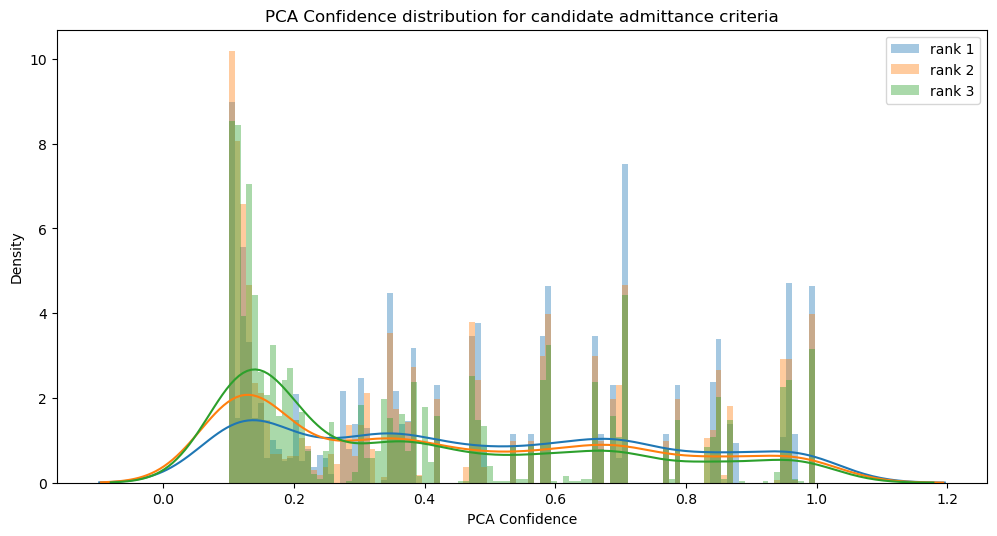

In [26]:
plt.subplots(figsize=(12,6), dpi=100)
for i, rank in enumerate(config.rank_cutoffs):
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", rank)
    sns.distplot(rules_set["PCA Confidence"] , color=sns.color_palette()[i], bins = 100, label="rank " +str(i+1))
plt.title('PCA Confidence distribution for candidate admittance criteria')
plt.legend();

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

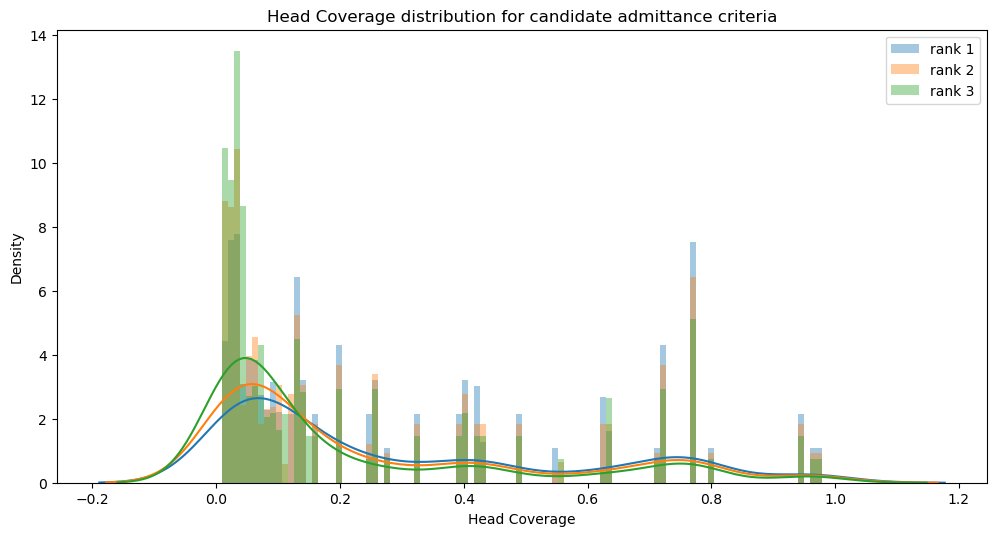

In [27]:
plt.subplots(figsize=(12,6), dpi=100)
for i, rank in enumerate(config.rank_cutoffs):
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", rank)
    sns.distplot(rules_set["Head Coverage"] , color=sns.color_palette()[i], bins = 100, label="rank " +str(i+1))
plt.title('Head Coverage distribution for candidate admittance criteria')
plt.legend();

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 50  Common rules: 94


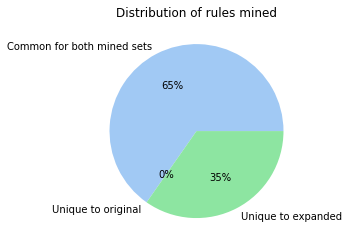

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 50  Common rules: 94


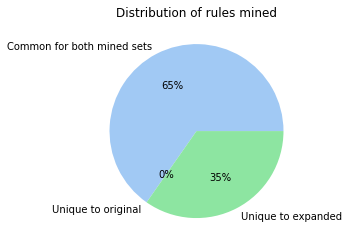

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 50  Common rules: 94


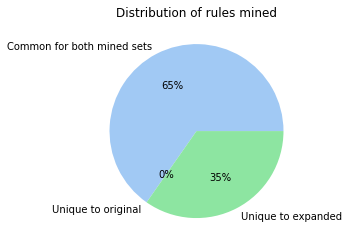

EXPANDED RULE SET  0
Unique original: 0  Unique expanded: 50  Common rules: 94


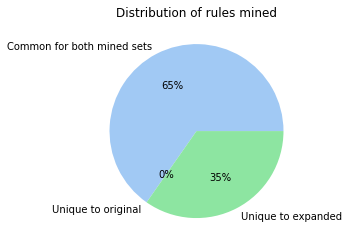

In [44]:
for percent in config.percents:
    percent_df = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", str(rank))
    display_comparison(original_rules, percent_df.drop_duplicates("Rule"))

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

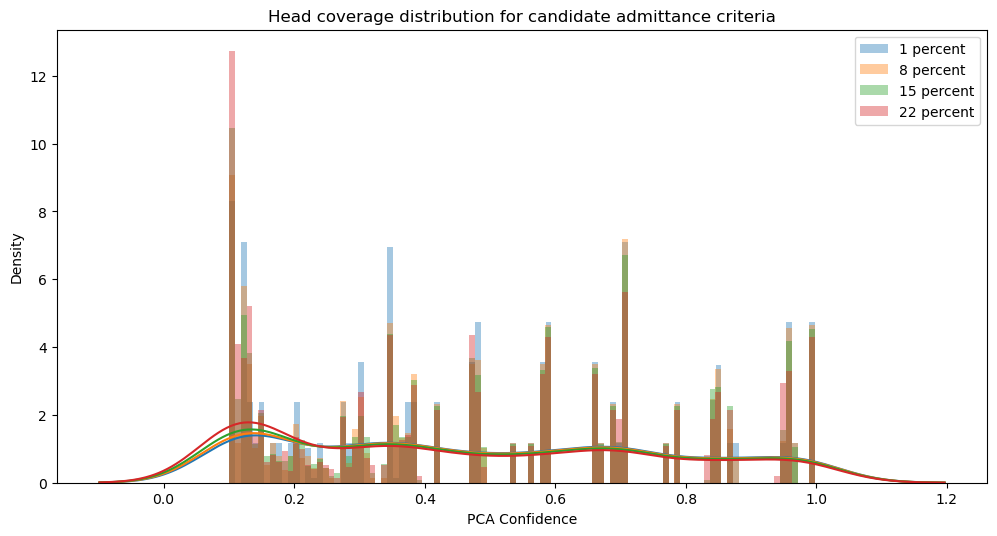

In [28]:
plt.subplots(figsize=(12,6), dpi=100)
for i, percentage in enumerate(config.percents):
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", percentage)
    sns.distplot(rules_set["PCA Confidence"] , color=sns.color_palette()[i], bins = 100, label=str(percentage[1]) + " percent")
plt.title('Head coverage distribution for candidate admittance criteria')
plt.legend();

/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Home/siv30/fak006/miniconda/envs/ampligraph/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

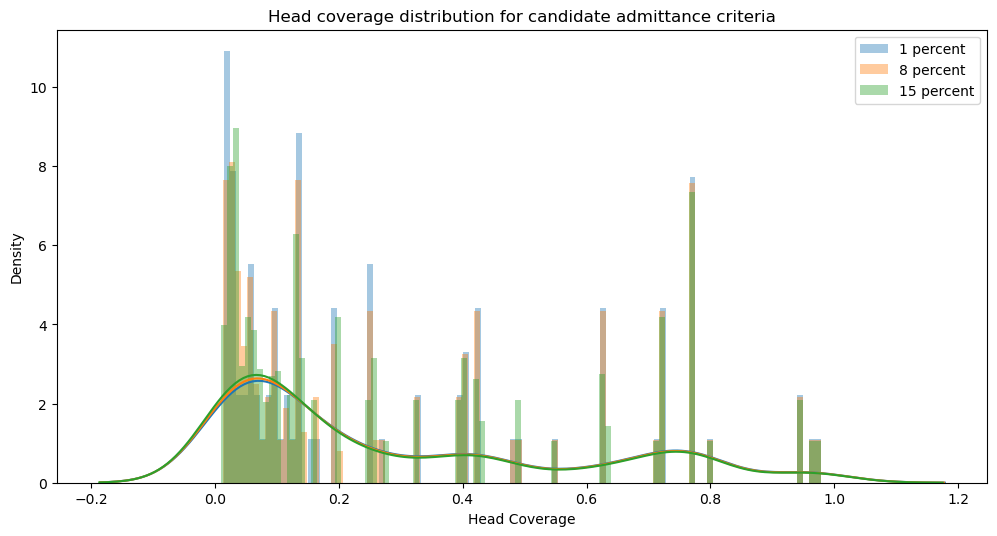

In [29]:
plt.subplots(figsize=(12,6), dpi=100)
for i, percentage in enumerate(config.percents):
    if i > 2:
        continue
    rules_set = get_dataframe_to_plot(mined_rules_parameters, "Candidate_criteria", percentage)
    sns.distplot(rules_set["Head Coverage"] , color=sns.color_palette()[i], bins = 100, label=str(percentage[1]) + " percent")
plt.title('Head coverage distribution for candidate admittance criteria')
plt.legend();

### PCA Confidence vs Head Coverage

In [30]:
def plot_scatterplot(mined_rules_df, parameter="Model"):
    plt.subplots(figsize=(12,6), dpi=100)
    plot = sns.scatterplot(data=mined_rules_df.sample(frac=1), x="PCA Confidence", y="Head Coverage", hue=parameter, alpha=1)
    plot.set_xlim(0.09, 0.5)
    plot.set_ylim(0, 0.16)
    plot.set_title("PCA Confidence vs Head coverage per " +parameter.lower())
    plt.legend()

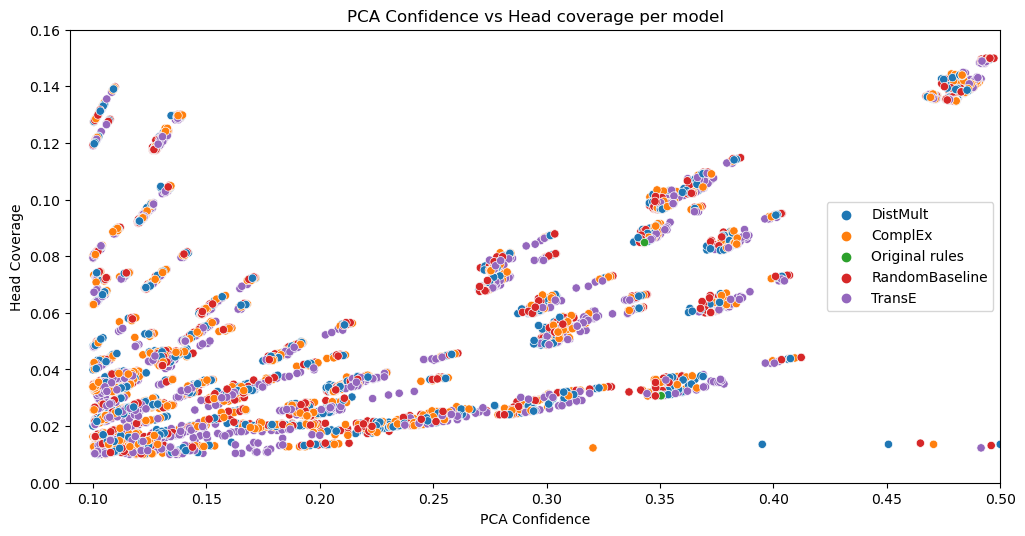

In [31]:
plot_scatterplot(mined_rules_parameters, parameter="Model")

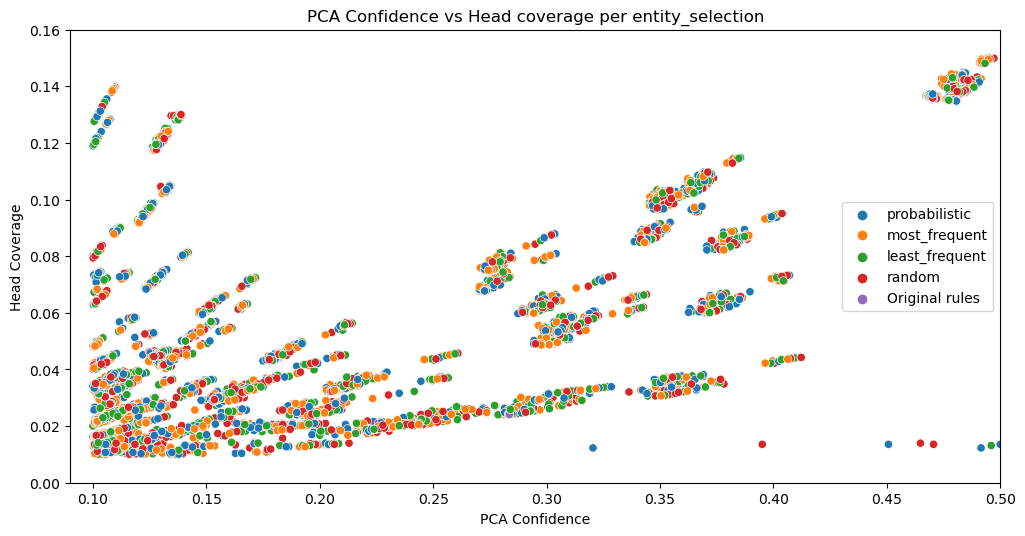

In [32]:
plot_scatterplot(mined_rules_parameters, parameter="Entity_selection")

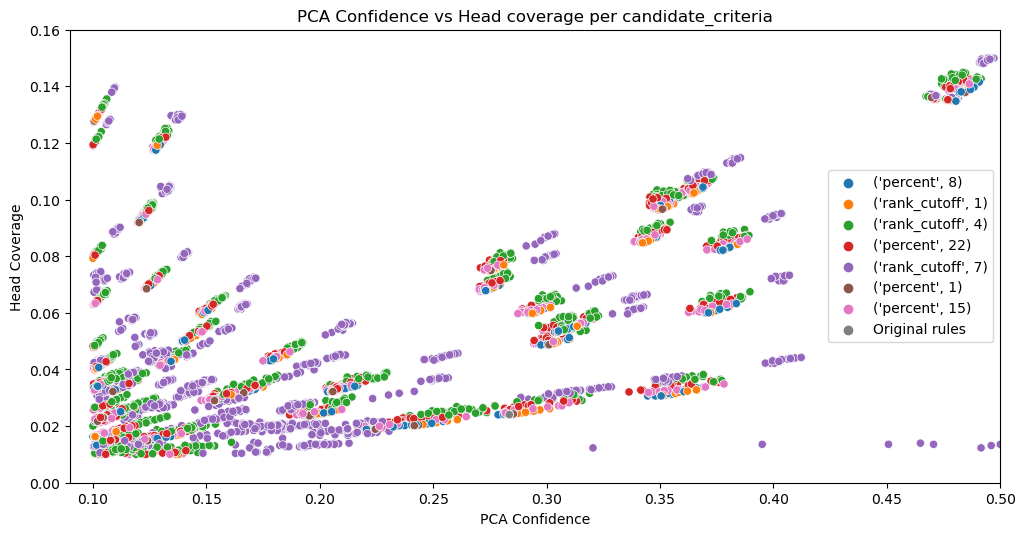

In [33]:
plot_scatterplot(mined_rules_parameters, parameter="Candidate_criteria")